# Practical example

We will need to:
- clean data
- relax assumptions
- log transformation
- create a model
- create dummies

## Importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [4]:
raw_data = pd.read_csv('/Users/jackyaffe/Google Drive/Jack/Udemy/DataSci/The Data Science Course 2018 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S35_L226/1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [6]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


We notice that each variable has a different number of observations, which means that there are missing values.

We can see unique entries for categorical variables. There are 312 different models in the data set, which is a hard thing to implement in a regression = 312 dummies!

Reliably implementing model into the regression will be tough, and a lot of the information could be engineered from brand, year and enginev, so we wont be losing too much variability if we drop it.

We can see the most common entries, and their frequency. There are 3947 'yes' entries for Registration, which is most of the dataset. It probably wont be a useful variable.



#### Determining the variables of interest

In [10]:
data = raw_data.drop(['Model'],axis=1) # drops model column
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### Dealing with missing vaues

In [13]:
data.isnull() # shows us a dataframe of missing values

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [14]:
data.isnull().sum() # shows us the sum of missing values per column

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Rule of thumb: if you are removing <5% of the observations, you are free to just remove all that have missing values.

In [16]:
data_no_mv = data.dropna(axis=0) # drop all rows that contain missing values

In [17]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### Exploring the PDFs

Seaborn can be used to explore the probability distribution frequencies for each variable

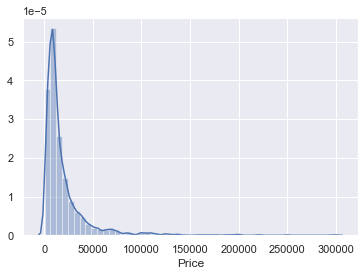

In [18]:
sns.distplot(data_no_mv['Price'])

For the optimal results, we would be looking for a normal distribution. Price, however, has an exponential distribution, which could be a problem for the regression.

There are clearly a few outliers in the price variable (max is 300,000).

One way to deal with this seamlessly is to remove the top 1% of observations.

Best way to do this with code is with the quantile method. DataFrame.quantile(the quantile) returns the value at the given quantile (= np.percentile)

#### Dealing with outliers

We want to get the 99th percentile and keep the data below it.

In [20]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


The max value is now 129,222 and the mean is 17,836. Whilst the max value is still far away from the mean, it is acceptably closer than before.

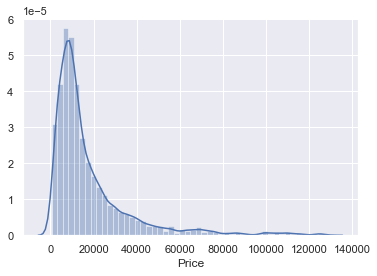

In [22]:
sns.distplot(data_1['Price'])

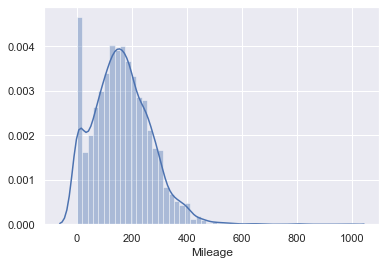

In [24]:
sns.distplot(data_no_mv['Mileage'])

In [25]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

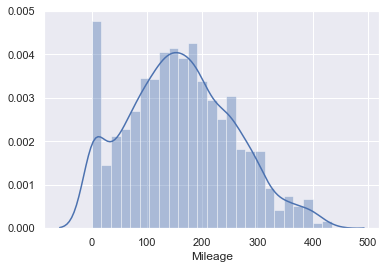

In [26]:
sns.distplot(data_2['Mileage'])

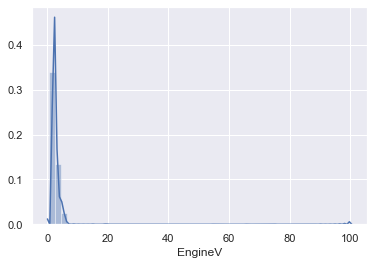

In [27]:
sns.distplot(data_no_mv['EngineV'])

If you look at the values for engineV, a lot of them at 99.99 which is not an expected value for engine volume. In fact, 99.99 is an old way to cater for missing values.

It is a bad idea to label values in this way (i.e. 99.99), but be aware that some people still do it.

We know that a reasonable upper limit is 6.5, so we can remove all values that are higher than that.

In [29]:
data_3 = data_2[data_2['EngineV']<6.5]

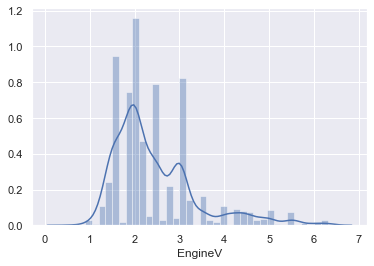

In [30]:
sns.distplot(data_3['EngineV'])

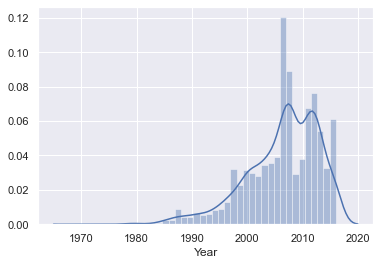

In [31]:
sns.distplot(data_3['Year'])

In [32]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

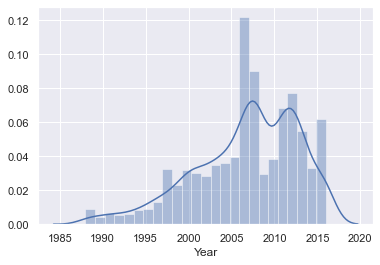

In [33]:
sns.distplot(data_4['Year'])

Currently the indices on the dataset refer to all the data, including the observations we removed. We want the index to be reset to only represent the cleaned dataset.

In [34]:
data_cleaned = data_4.reset_index(drop=True)

In [35]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


Overall we deleted around 250 observations, but that is a worthwhile exercise.

### Checking the OLS assumptions

Price, year, enginev and mileage are those that are the more challenging variables and could cause us more problems as they are continuous variables.

We can check for linearity initially...

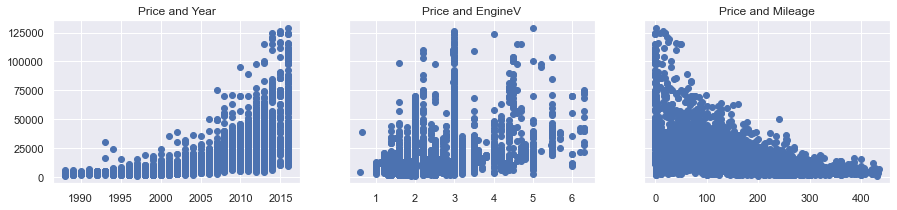

In [36]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

We can see patterns but they are definitely not linear. We should not run linear regressions on these variables yet.

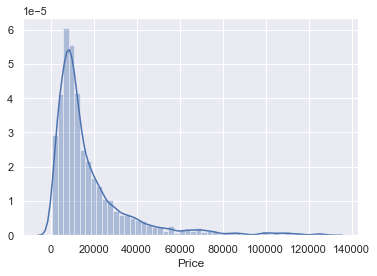

In [37]:
sns.distplot(data_cleaned['Price'])

Price is not normally distributed either, so its relationships with other features is not linear. It is exponential.
Log transformations are especially useful when facing exponential relationships.

#### Relaxing the assumptions

np.log(x) returns the natural logarithm of a number or array of numbers

In [38]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


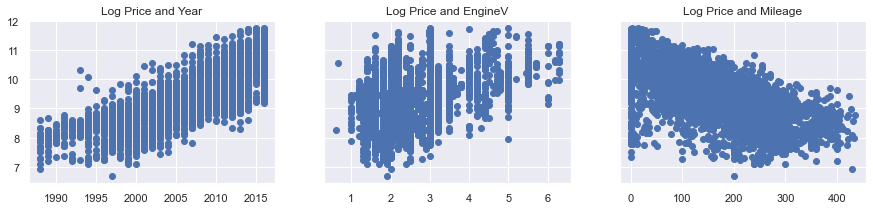

In [40]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

The new distributions are far more linear and so we can drop the original price variable as it is no longer needed.

In [41]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

#### Multicollinearity

We usually need to deal with the no endogeneity assumption. The assumption is not violated in this case. We can discuss the residuals after the regression is created.

The third assumption had three parts:
- Normality: assumed for a big sample following the central limit theorem
- Zero mean: accomplished by inclusion of intercept in regression
- Homoscedasticity: generally holds as we can see in the new graphs as we already implemented a log transformation.

No autocorrelation - the obs are not coming from time series or panel data, they are just a time shot. There is no reasons for the variables to be dependent on each other.

We do need to check for multicollinearity




In [42]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

It is logical that year and mileage will be correlated.

sklearn does not have a dedicated method to check this assumption.

One of the best ways to check for multicollinearity is through VIF (variance inflation factor)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [44]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


When VIF is 1, there is no multicollinearity at all. It is the min value of the measure. Between 1 and 5 is fine. Some say a VIF above 5 is unacceptable, some say 6. There is no firm concensus. Some even say 10.

In this case the Year is definitely too high, so we can remove that.

In [46]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

#### Create dummy variables

Pandas is equipped with a function that can help with getting dummy variables.

pd.get_dummies(df[,drop_first]) spots all categorical variables and creates dummies automatically.

If we have N categories for a features, we have to create N-1 dummies. 

In [47]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)

The drop_first param means we dont want to create a dummy variable for Audi, i.e. the N-1 dummies thing.

In [48]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


#### Rearrange a bit

In [49]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [50]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [51]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Linear regression model

#### Declare the inputs and the targets

In [52]:
targets =  data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

#### Scale the data

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [55]:
inputs_scaled = scaler.transform(inputs)

It is not usually recommended to standardise dummy variables.

For ML, scaling has no effect on the predictive power of dummies. Once scaled, though, they lose all their dummy meaning.

#### Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)

#### Create the regression

In [58]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

This regression model is actually a log-linear regression as the dependent variable is the log of 'Price'

In [59]:
y_hat = reg.predict(x_train)

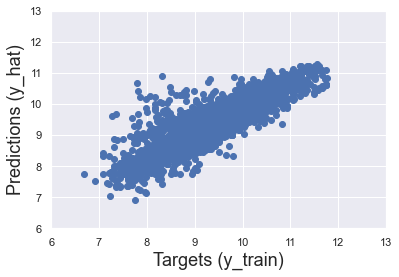

In [60]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

We can see the data points pass through the 45 degree line in general, so the model is OK so far...

We can also check the residual plot, to see the differences between the targets and the predictions.

Text(0.5, 1.0, 'Residuals PDF')

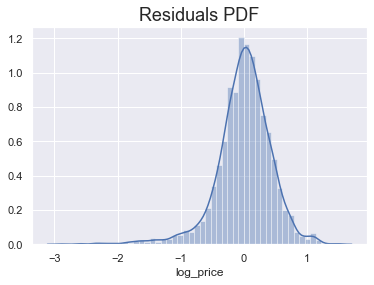

In [61]:
sns.distplot(y_train-y_hat)
plt.title('Residuals PDF',size=18)

The residuals are the estimates of the errors and the results look normally distributed with a mean around 0. The only issue could be a slightly longer tail on the negative side. There are certain observations for which (y_train - y_hat) is much lower than the mean (a much higher price is predicted than is observed at the lower end).

In [62]:
reg.score(x_train,y_train)

0.744996578792662

Our model explains 75% of the variability of the data. This is good but could be better.

#### FInding the weights and bias

In [63]:
reg.intercept_

9.415239458021299

In [64]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [65]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


This model is far from interperetable for now.

Weights interpretation for continuous variables:
- A positive weight shows that as a feature increases in value, so do the log_price and 'Price' respectively
- A negative weight shows that as a feature increases in value, log_price and 'Price' decrease

This is not the case for dummy variables:
- A positive weight shows that the respective category (Brand) is more expensive than the benchmark (Audi)
- A negative weight shows that the respective category (Brand) is less expensive than the benchmark (Audi)

The bigger the weight, the bigger the impact.

It doesn't make sense to compare continuous variables to the dummies. Dummies are only compared to their respective benchmark. 

#### Testing

In [70]:
y_hat_test = reg.predict(x_test)

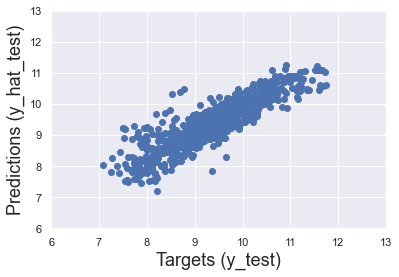

In [72]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

We have a higher concentration of prices at the higher end, as the points are closer to the regression. They are more scattered at the lower end.

We can add alpha to show the opacity of the scatter.

plt.scatter(y_test,y_hat_test,alpha)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

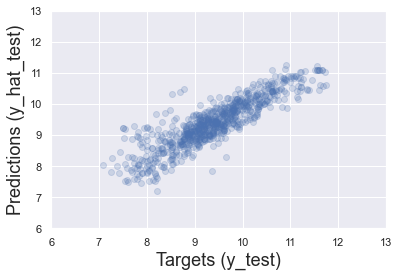

In [74]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

The more saturated the colour, the higher the concentration of points

In [76]:
df_pf = pd.DataFrame(y_hat_test,columns=['Prediction'])
df_pf.head()

,Prediction
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280


The prices are in log form, so we need to convert them back by taking the exponential.

In [77]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [79]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


In [80]:
y_test

1192     7.740664
3360     7.937375
2350     7.824046
3257     8.764053
892      9.121509
          ...    
1935    10.292146
3757     9.169518
3134     9.814656
1369    11.134589
2595     9.287301
Name: log_price, Length: 774, dtype: float64

Indices are wrong and misleading here...

In [81]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [82]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [83]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [85]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [86]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


The residuals give an indication of how good the model was.
The min residual diff was 0.06% which shows in that instance the model was very good at predicting, but the max of 512% difference shows that it did get some very wrong.

The 25,50,75 percentiles show that the scores were generally lower than 40% difference, which is ok.

In [89]:
pd.options.display.max_rows = 999 # change pandas display options
pd.set_option('display.float_format', lambda x: '%.2f' % x) # set two d.p.
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


If you look at the resutls with the highest difference, we can see that they are mostly predictions are the lower end, and in most cases, the actual prices were much lower than the predicted value. This can mean that we are missing something.

It could be the model of the car, which we removed,or it may be that the car was damaged in some way.

We could improve our model by:
- use a different set of variabiles
- remove a bigger part of the outliers
- use different kinds of transformations

This model is not perfect, there is a lot to go with it.

Typically models require lots of tweaking and exporation to get to a point when they are 'good', or suitable for purpose.